<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Time Series Analysis</h1>
        <h2>Data Exploration</h2>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import watermark

%matplotlib inline
%load_ext watermark

List out the versions of all loaded libraries

In [2]:
%watermark -n -v -m -g -iv

matplotlib 3.1.0
numpy      1.16.2
pandas     0.24.2
watermark  1.8.1
Fri Jan 17 2020 

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.2.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 7665e6b9e1421320194a6197b4b98d629fe59ee0


Set the default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')

# GDP

The first timeseries will consider is the US Quarterly GDP for the past 70 years.

In [4]:
GDP = pd.read_csv('data/GDP.csv', parse_dates=['DATE'])

In [5]:
GDP.set_index('DATE', inplace=True)

In [7]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1947-01-01 to 2019-04-01
Data columns (total 1 columns):
GDP    290 non-null float64
dtypes: float64(1)
memory usage: 4.5 KB


Text(0, 0.5, 'GDP ($\\$B$)')

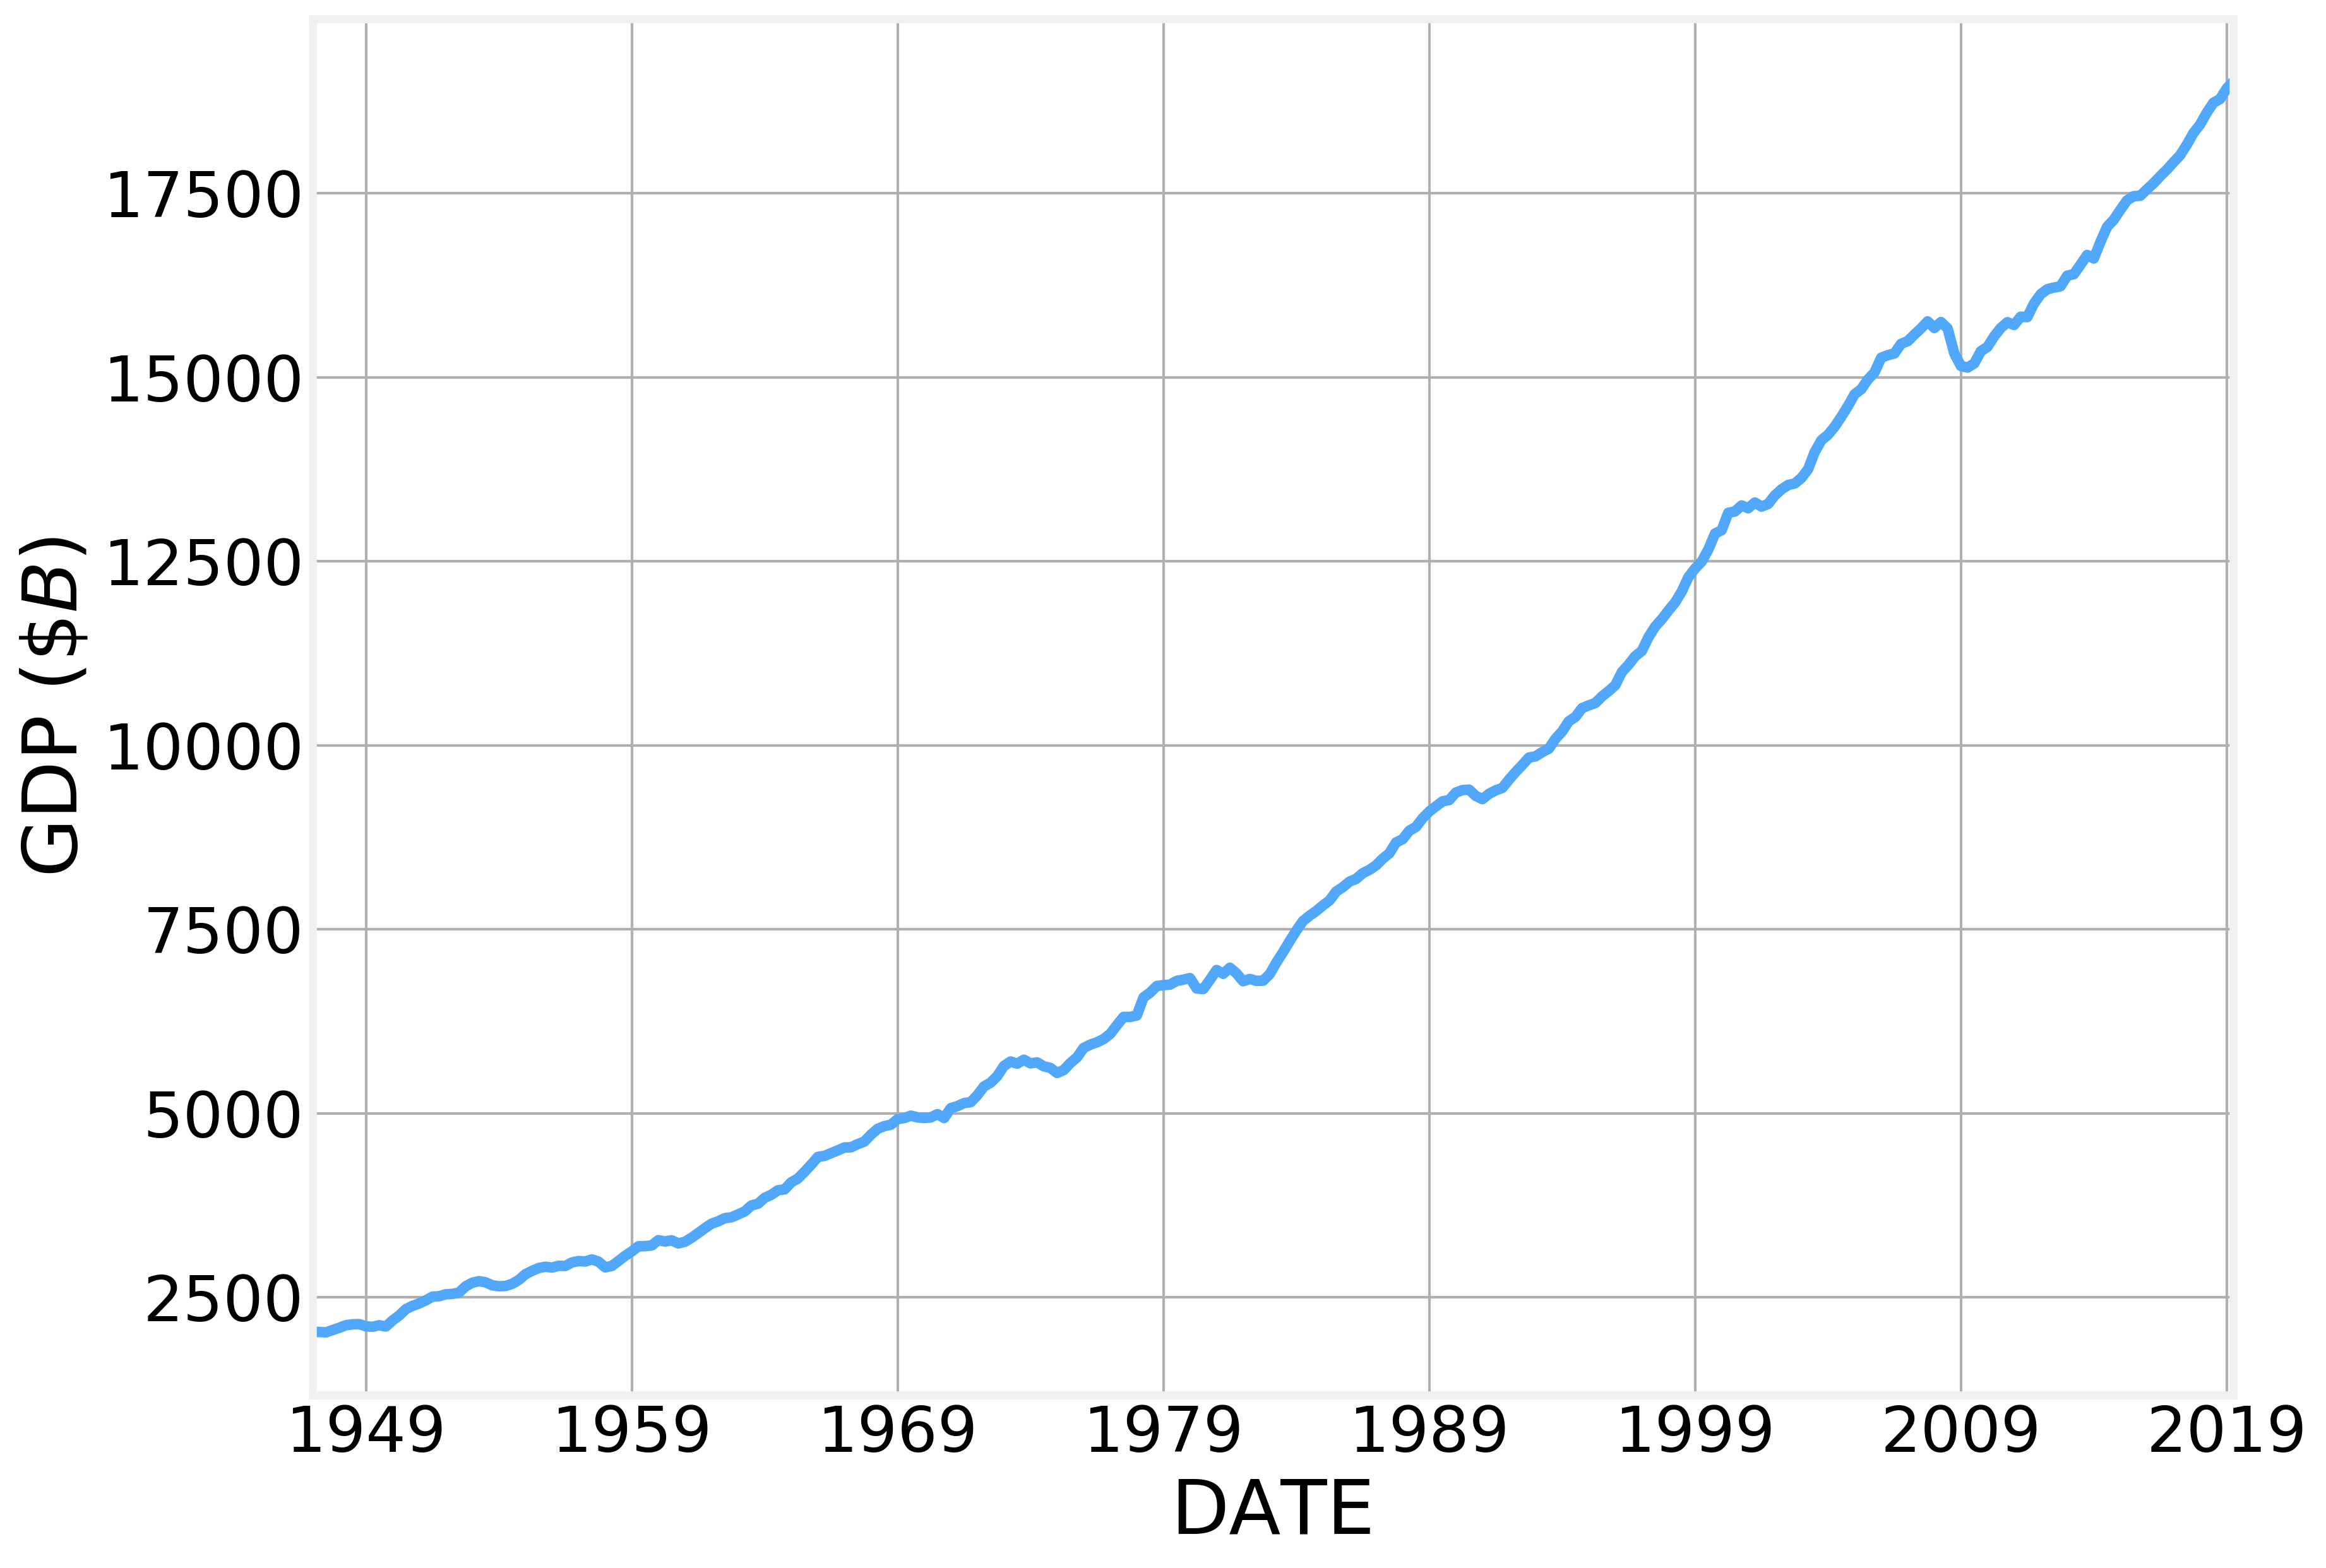

In [8]:
GDP.plot(legend=False)
plt.gca().set_ylabel(r'GDP ($\$B$)')

It displays a clear upward trend

# Influenza mortality

Next, we look the percentage of deaths attributed to Influenza and Pneumonia in the past 8 years

In [10]:
ILI = pd.read_csv('data/CDC.csv')

In [11]:
ILI['date'] = ILI['Year']+ILI['Week']/52.

In [12]:
ILI.head()

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths,date
0,2012,1,8.479120,8.15718,8.49104,51102,4323,10,2012.019231
1,2012,2,8.343472,8.22181,8.55556,50962,4245,7,2012.038462
2,2012,3,8.370908,8.27534,8.60898,51010,4261,9,2012.057692
3,2012,4,8.448458,8.31696,8.65049,50163,4227,11,2012.076923
4,2012,5,8.140332,8.34602,8.67945,49568,4026,9,2012.096154


Text(0, 0.5, '% Mortality')

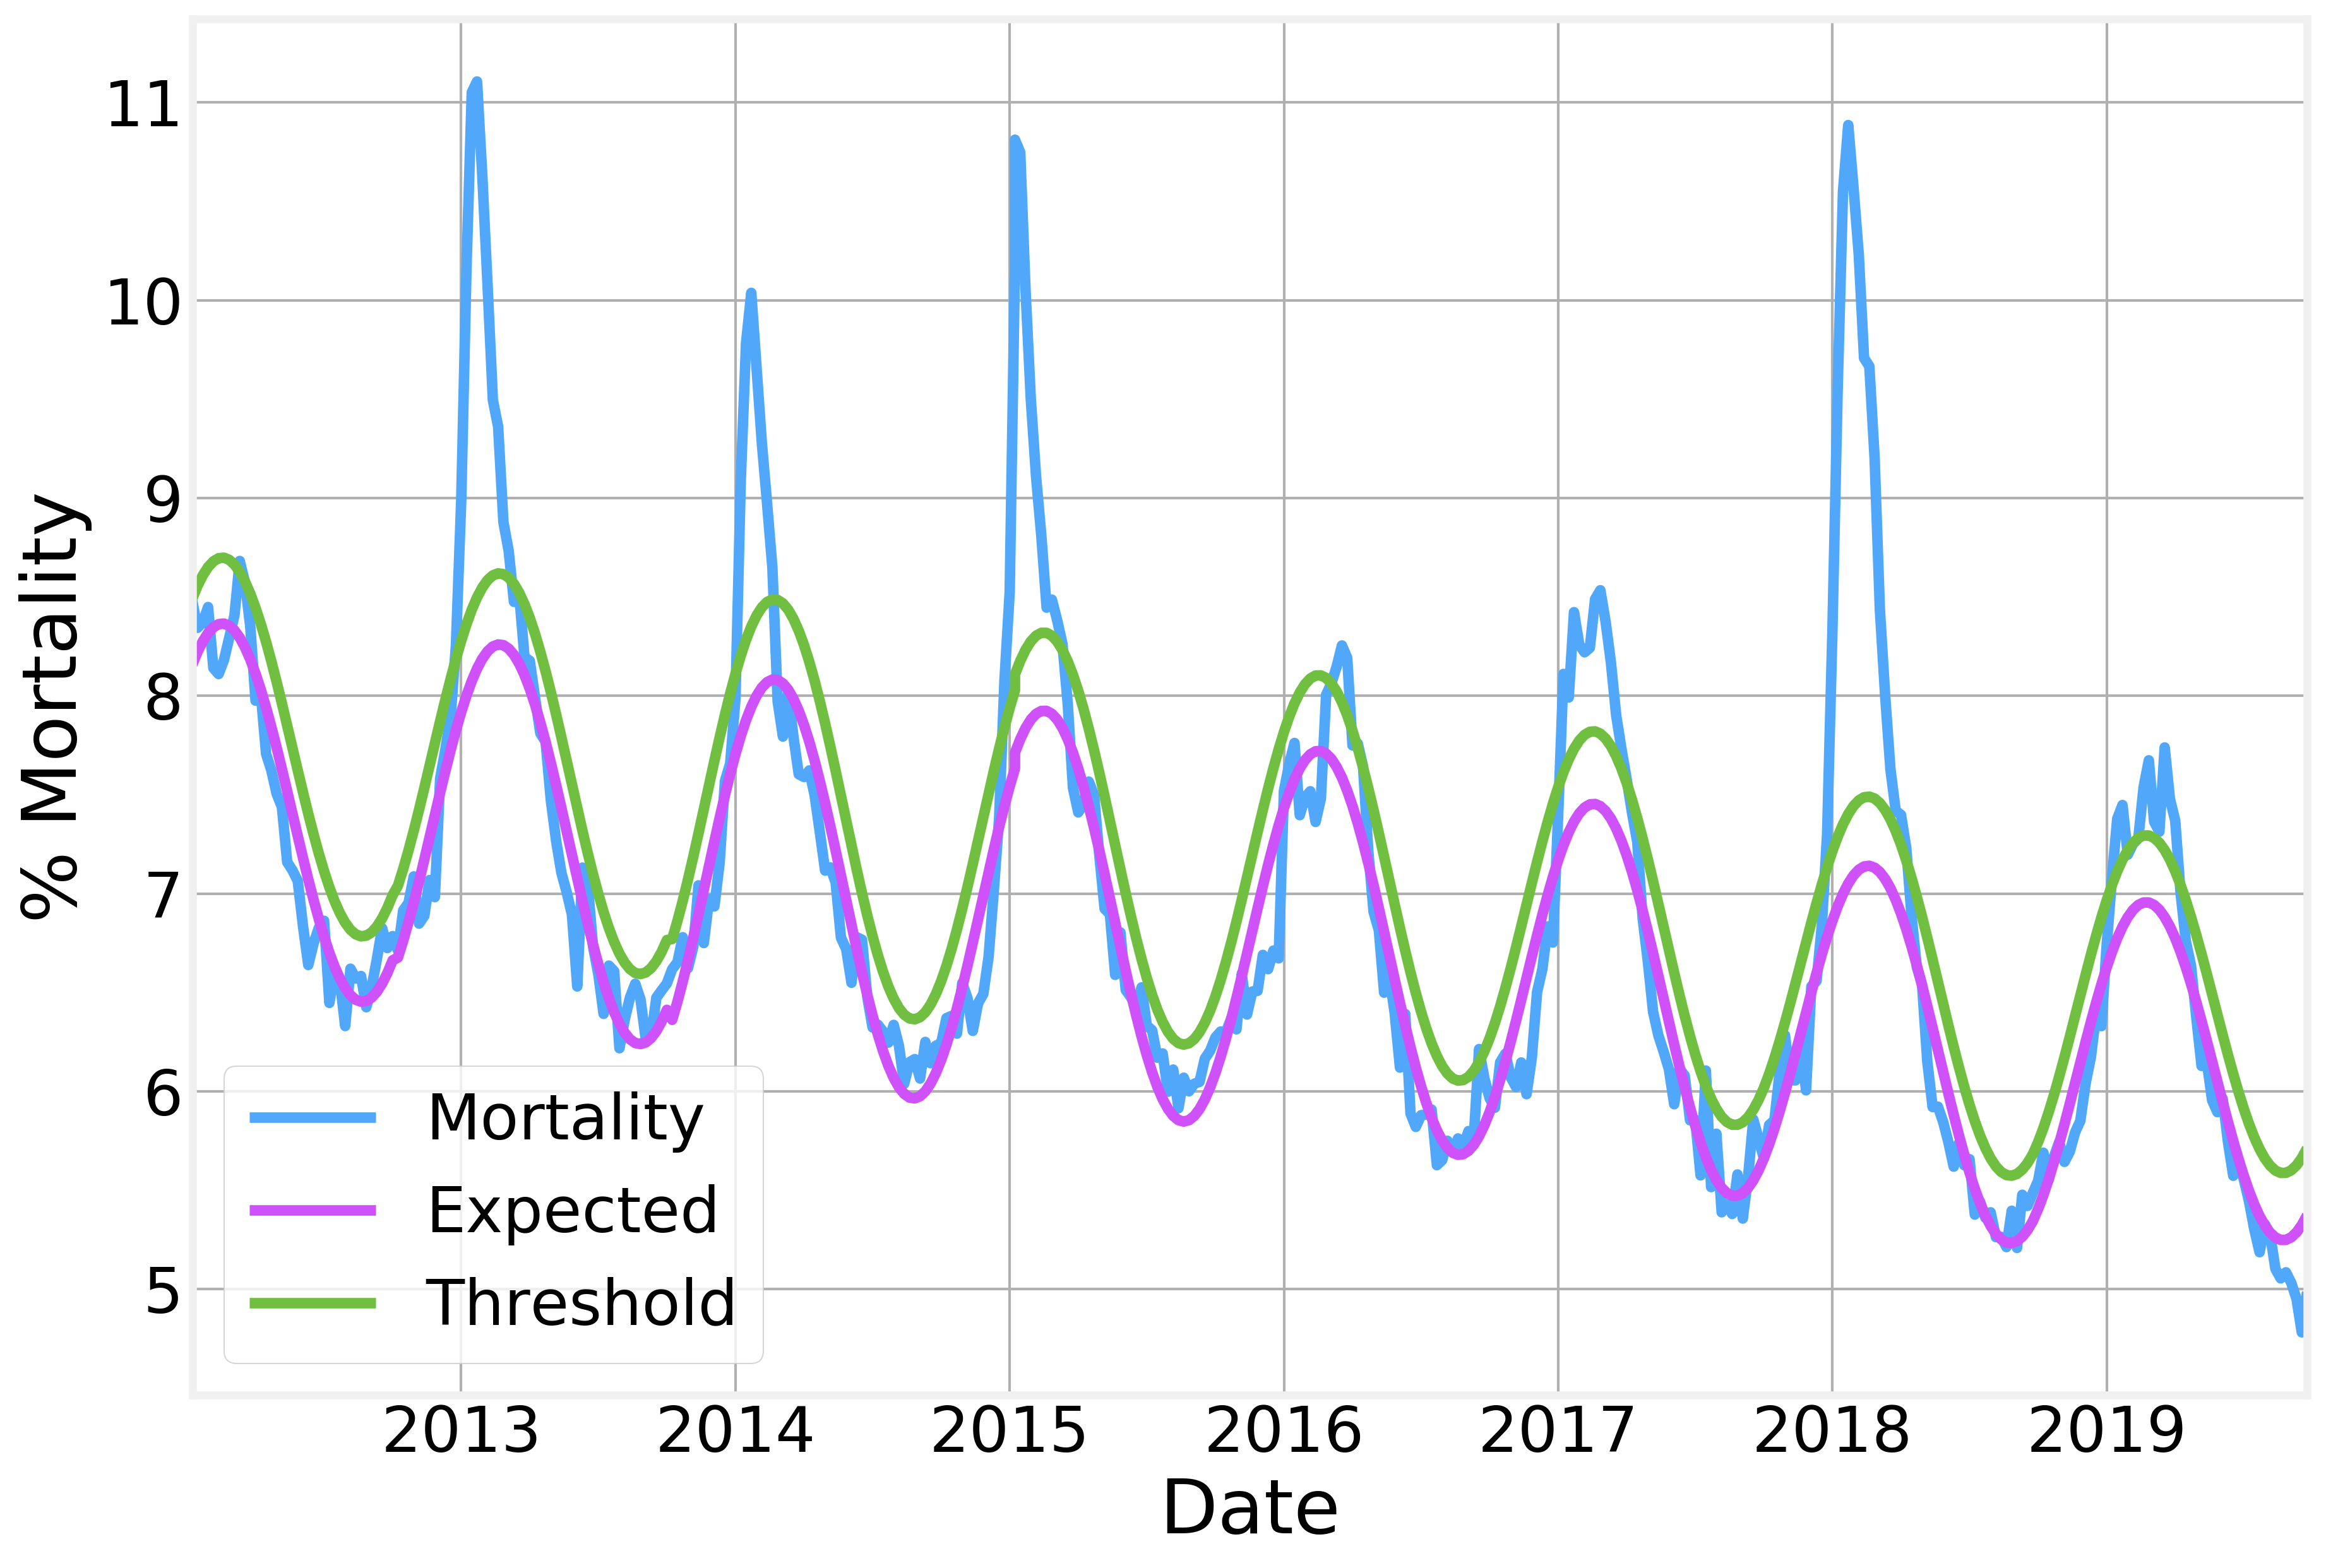

In [13]:
ILI.plot(x='date', y=['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold'])
ax = plt.gca()
ax.legend(['Mortality', 'Expected', 'Threshold'])
ax.set_xlabel('Date')
ax.set_ylabel('% Mortality')

The seasonal behavior in unmistakable. The purple curve illustrates the expected seasonal behavior, while the green curve displays the threshold above which we are facing an epidemic

# Sun activity

The number of observed sun spots over 300 years also display a nice seasonal behavior over the course of a decade or so

In [14]:
Sun = pd.read_csv('data/sun.csv')

Text(0.5, 0, 'Year')

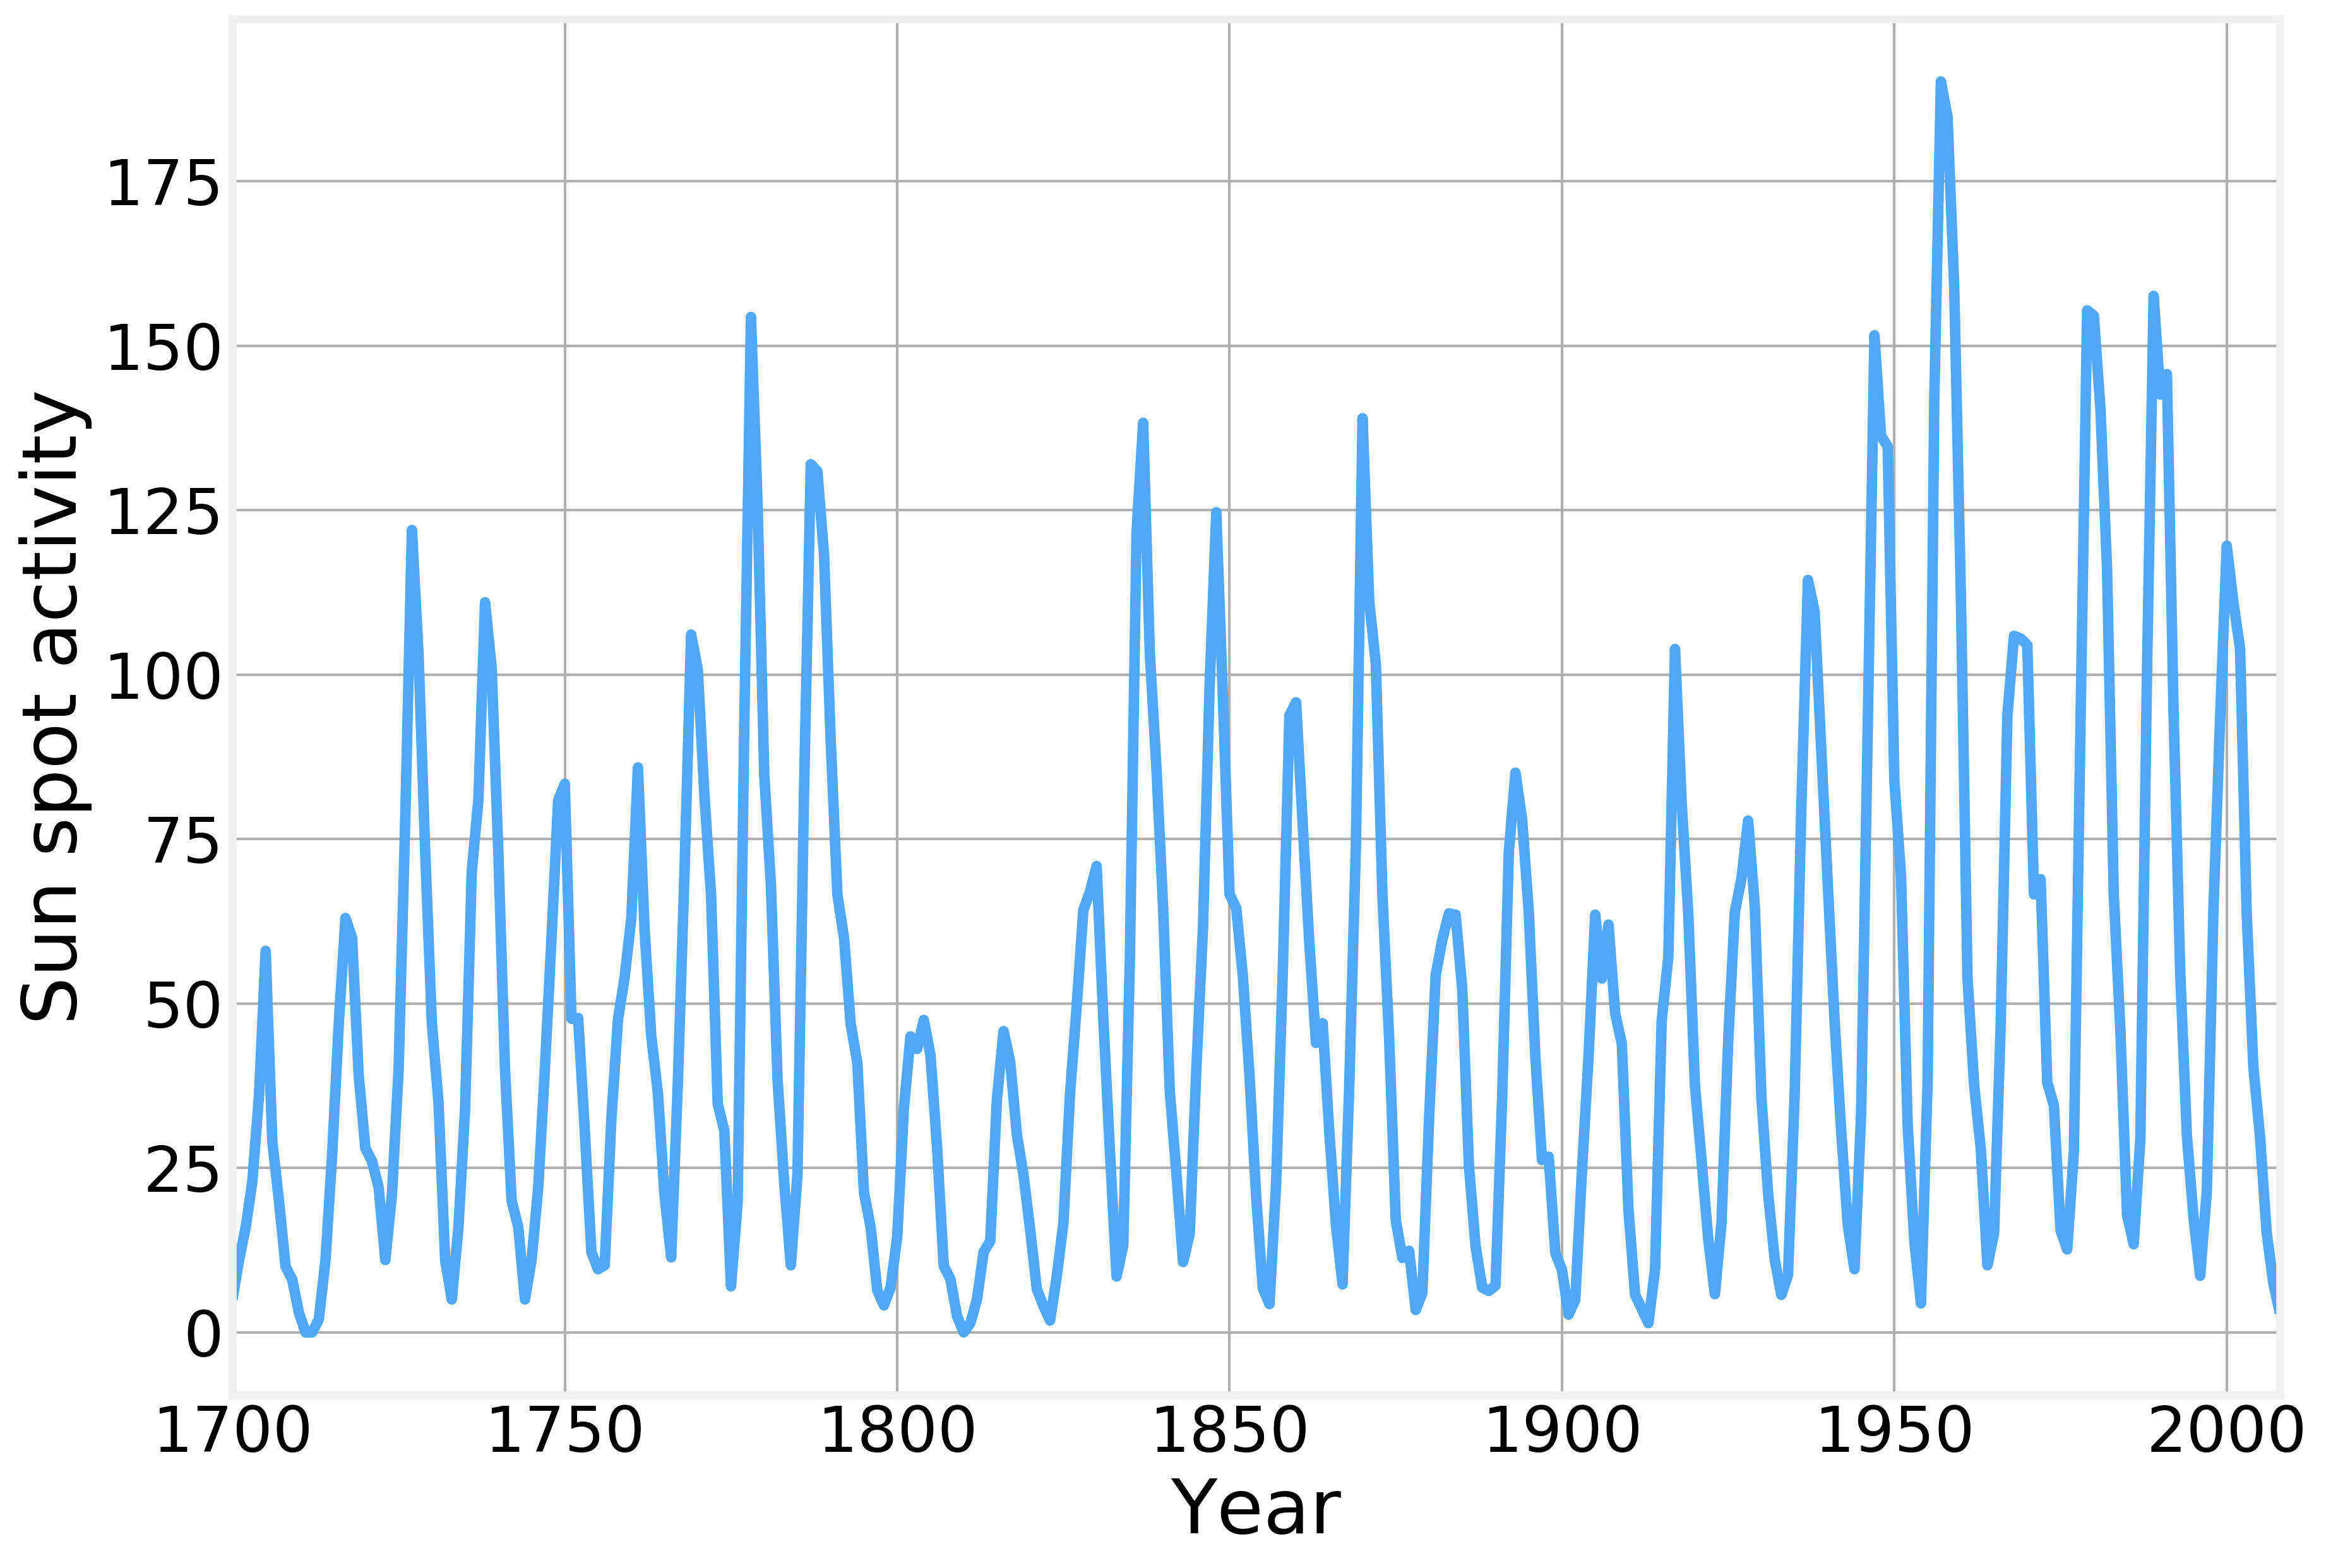

In [15]:
Sun.plot(x='YEAR', y='SUNACTIVITY', legend=False)
ax = plt.gca()
ax.set_ylabel('Sun spot activity')
ax.set_xlabel('Year')

# Dow-Jones Industrial Average

The Dow-Jones Industrial Average also has a clear uptrend like GDP but with significantly larger flucutations

In [19]:
DJIA = pd.read_csv('data/DJIA.csv', parse_dates=['DATE'], na_values='.')

In [20]:
DJIA.set_index('DATE', inplace=True)

Text(0.5, 0, 'Date')

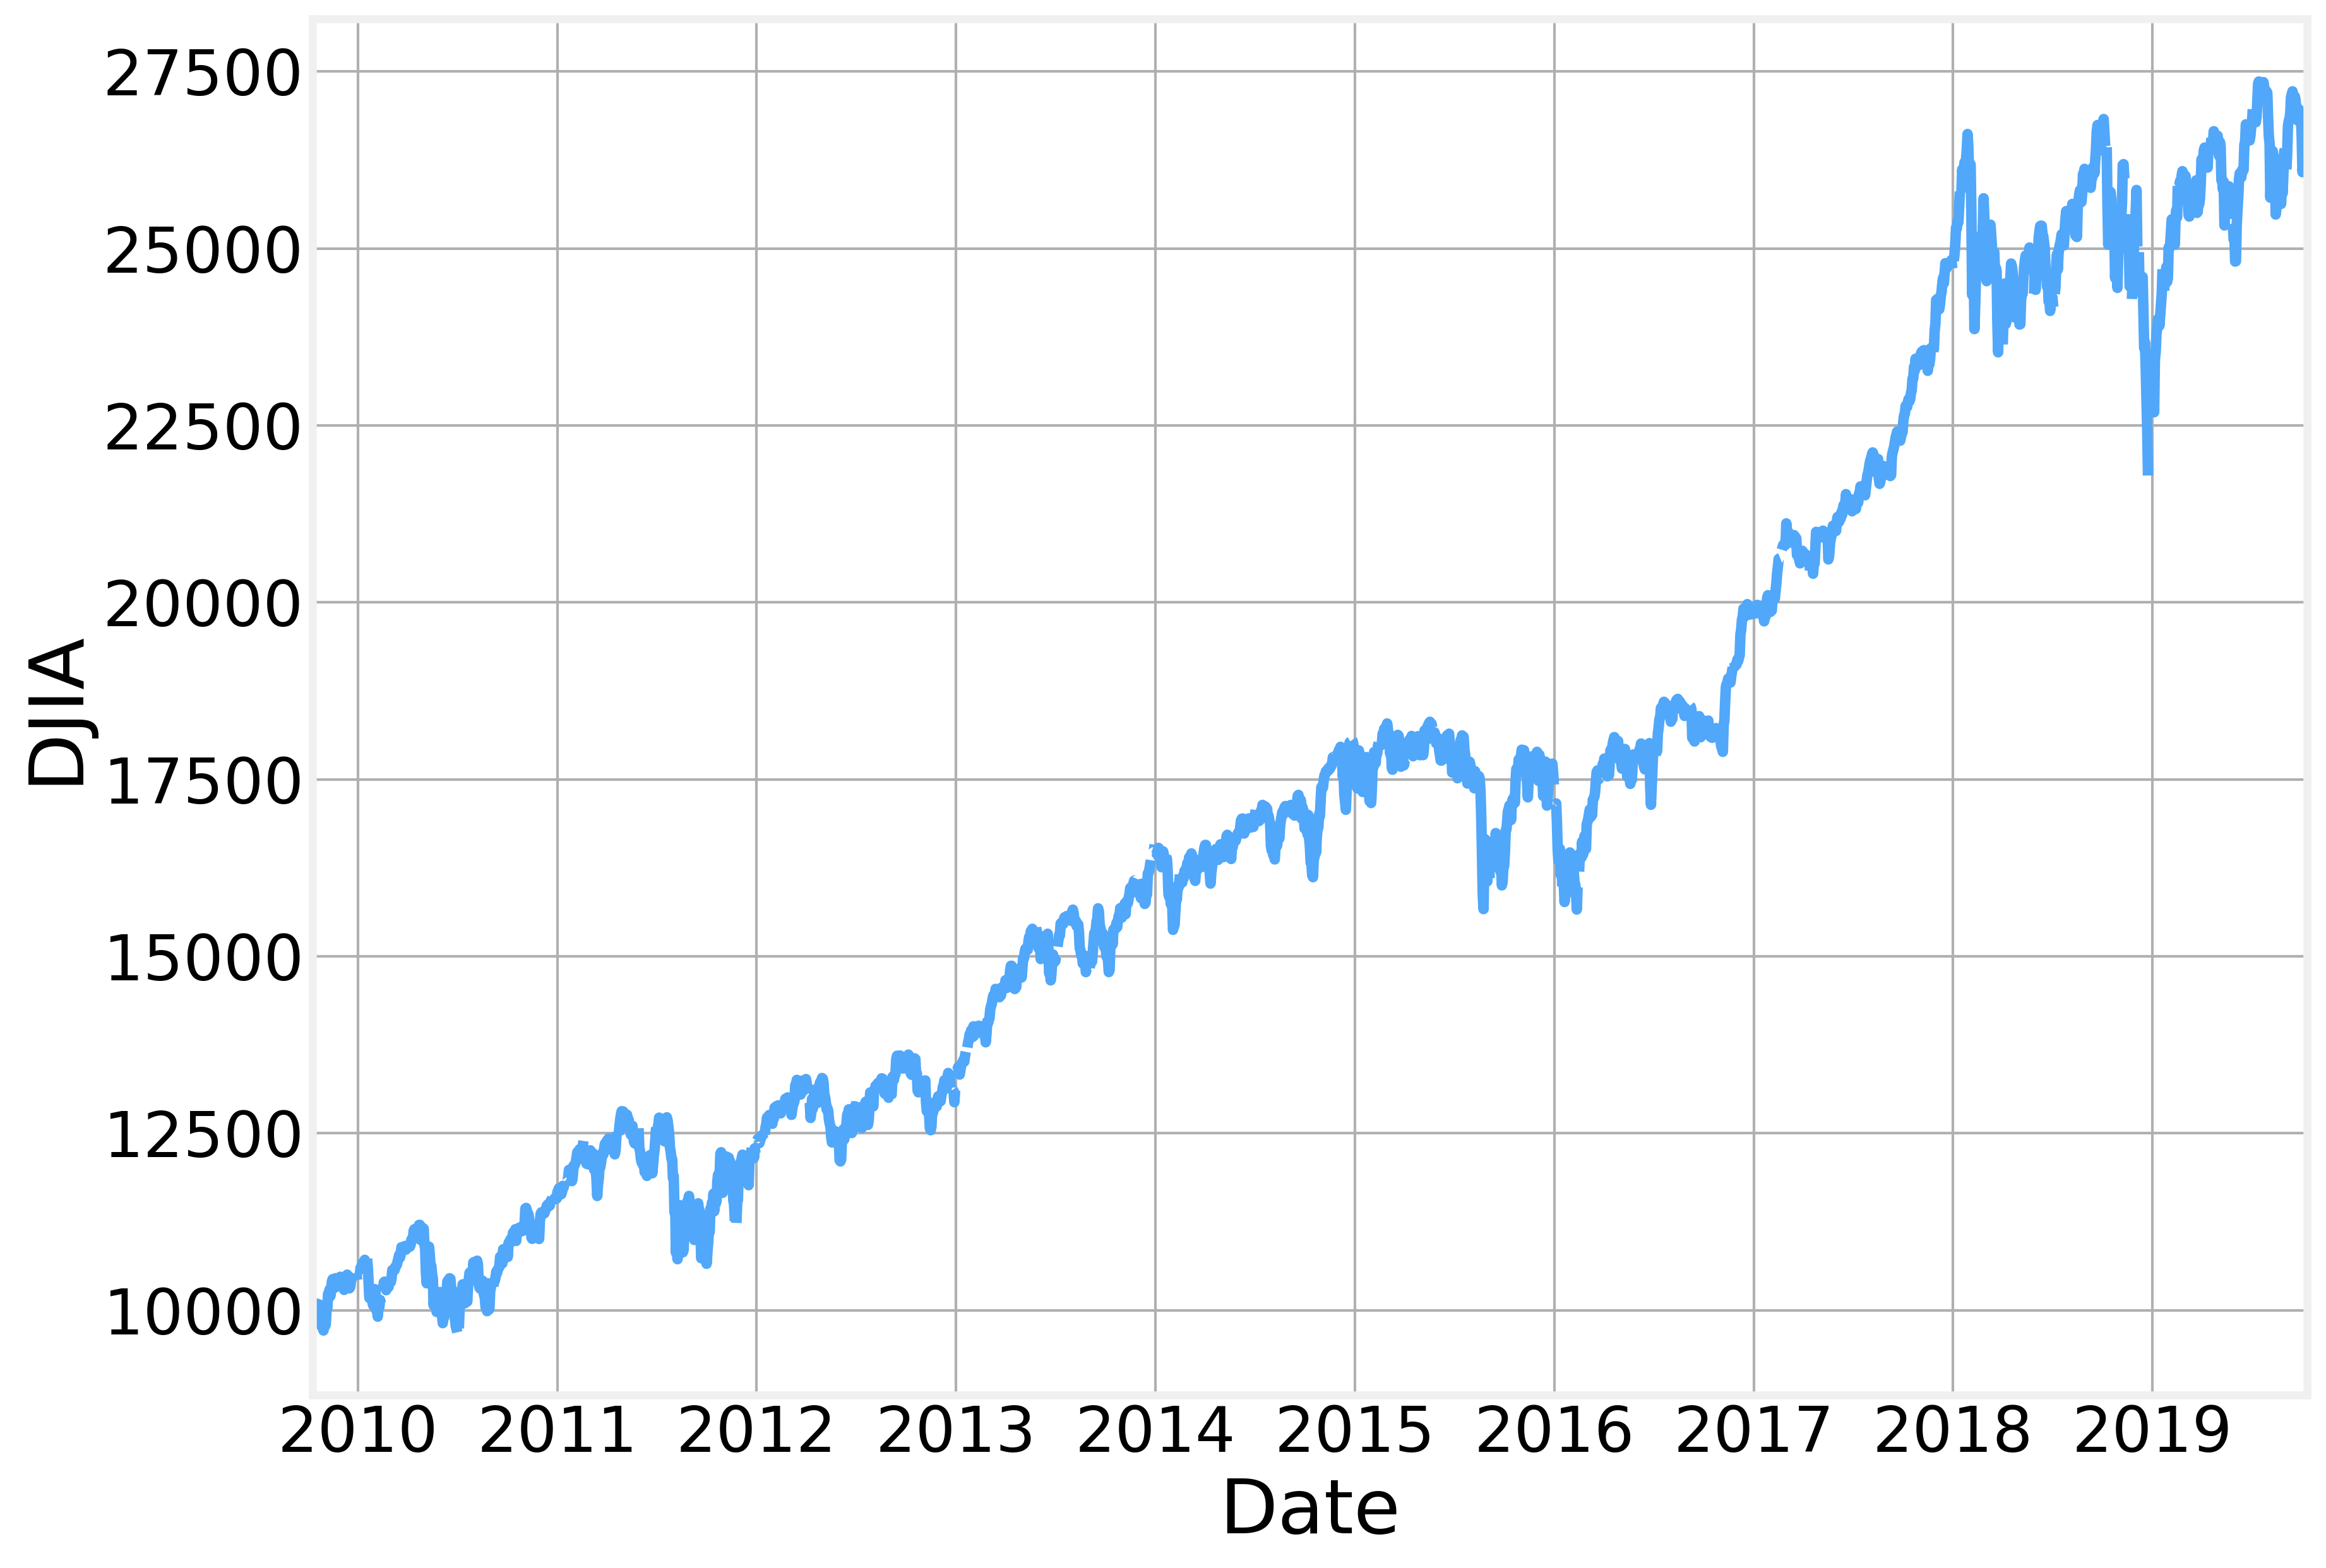

In [21]:
DJIA.plot(legend=False)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')

# Airline Passengers

The number of passenters in international flights in the 50s displays both a trend and a seasonal pattern

In [22]:
airline = pd.read_csv('data/international-airline-passengers.csv', sep=';')

In [24]:
airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [25]:
airline['Month'] = pd.to_datetime(airline['Month']+'-01')

In [26]:
airline.set_index('Month', inplace=True)

In [28]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Passengers')

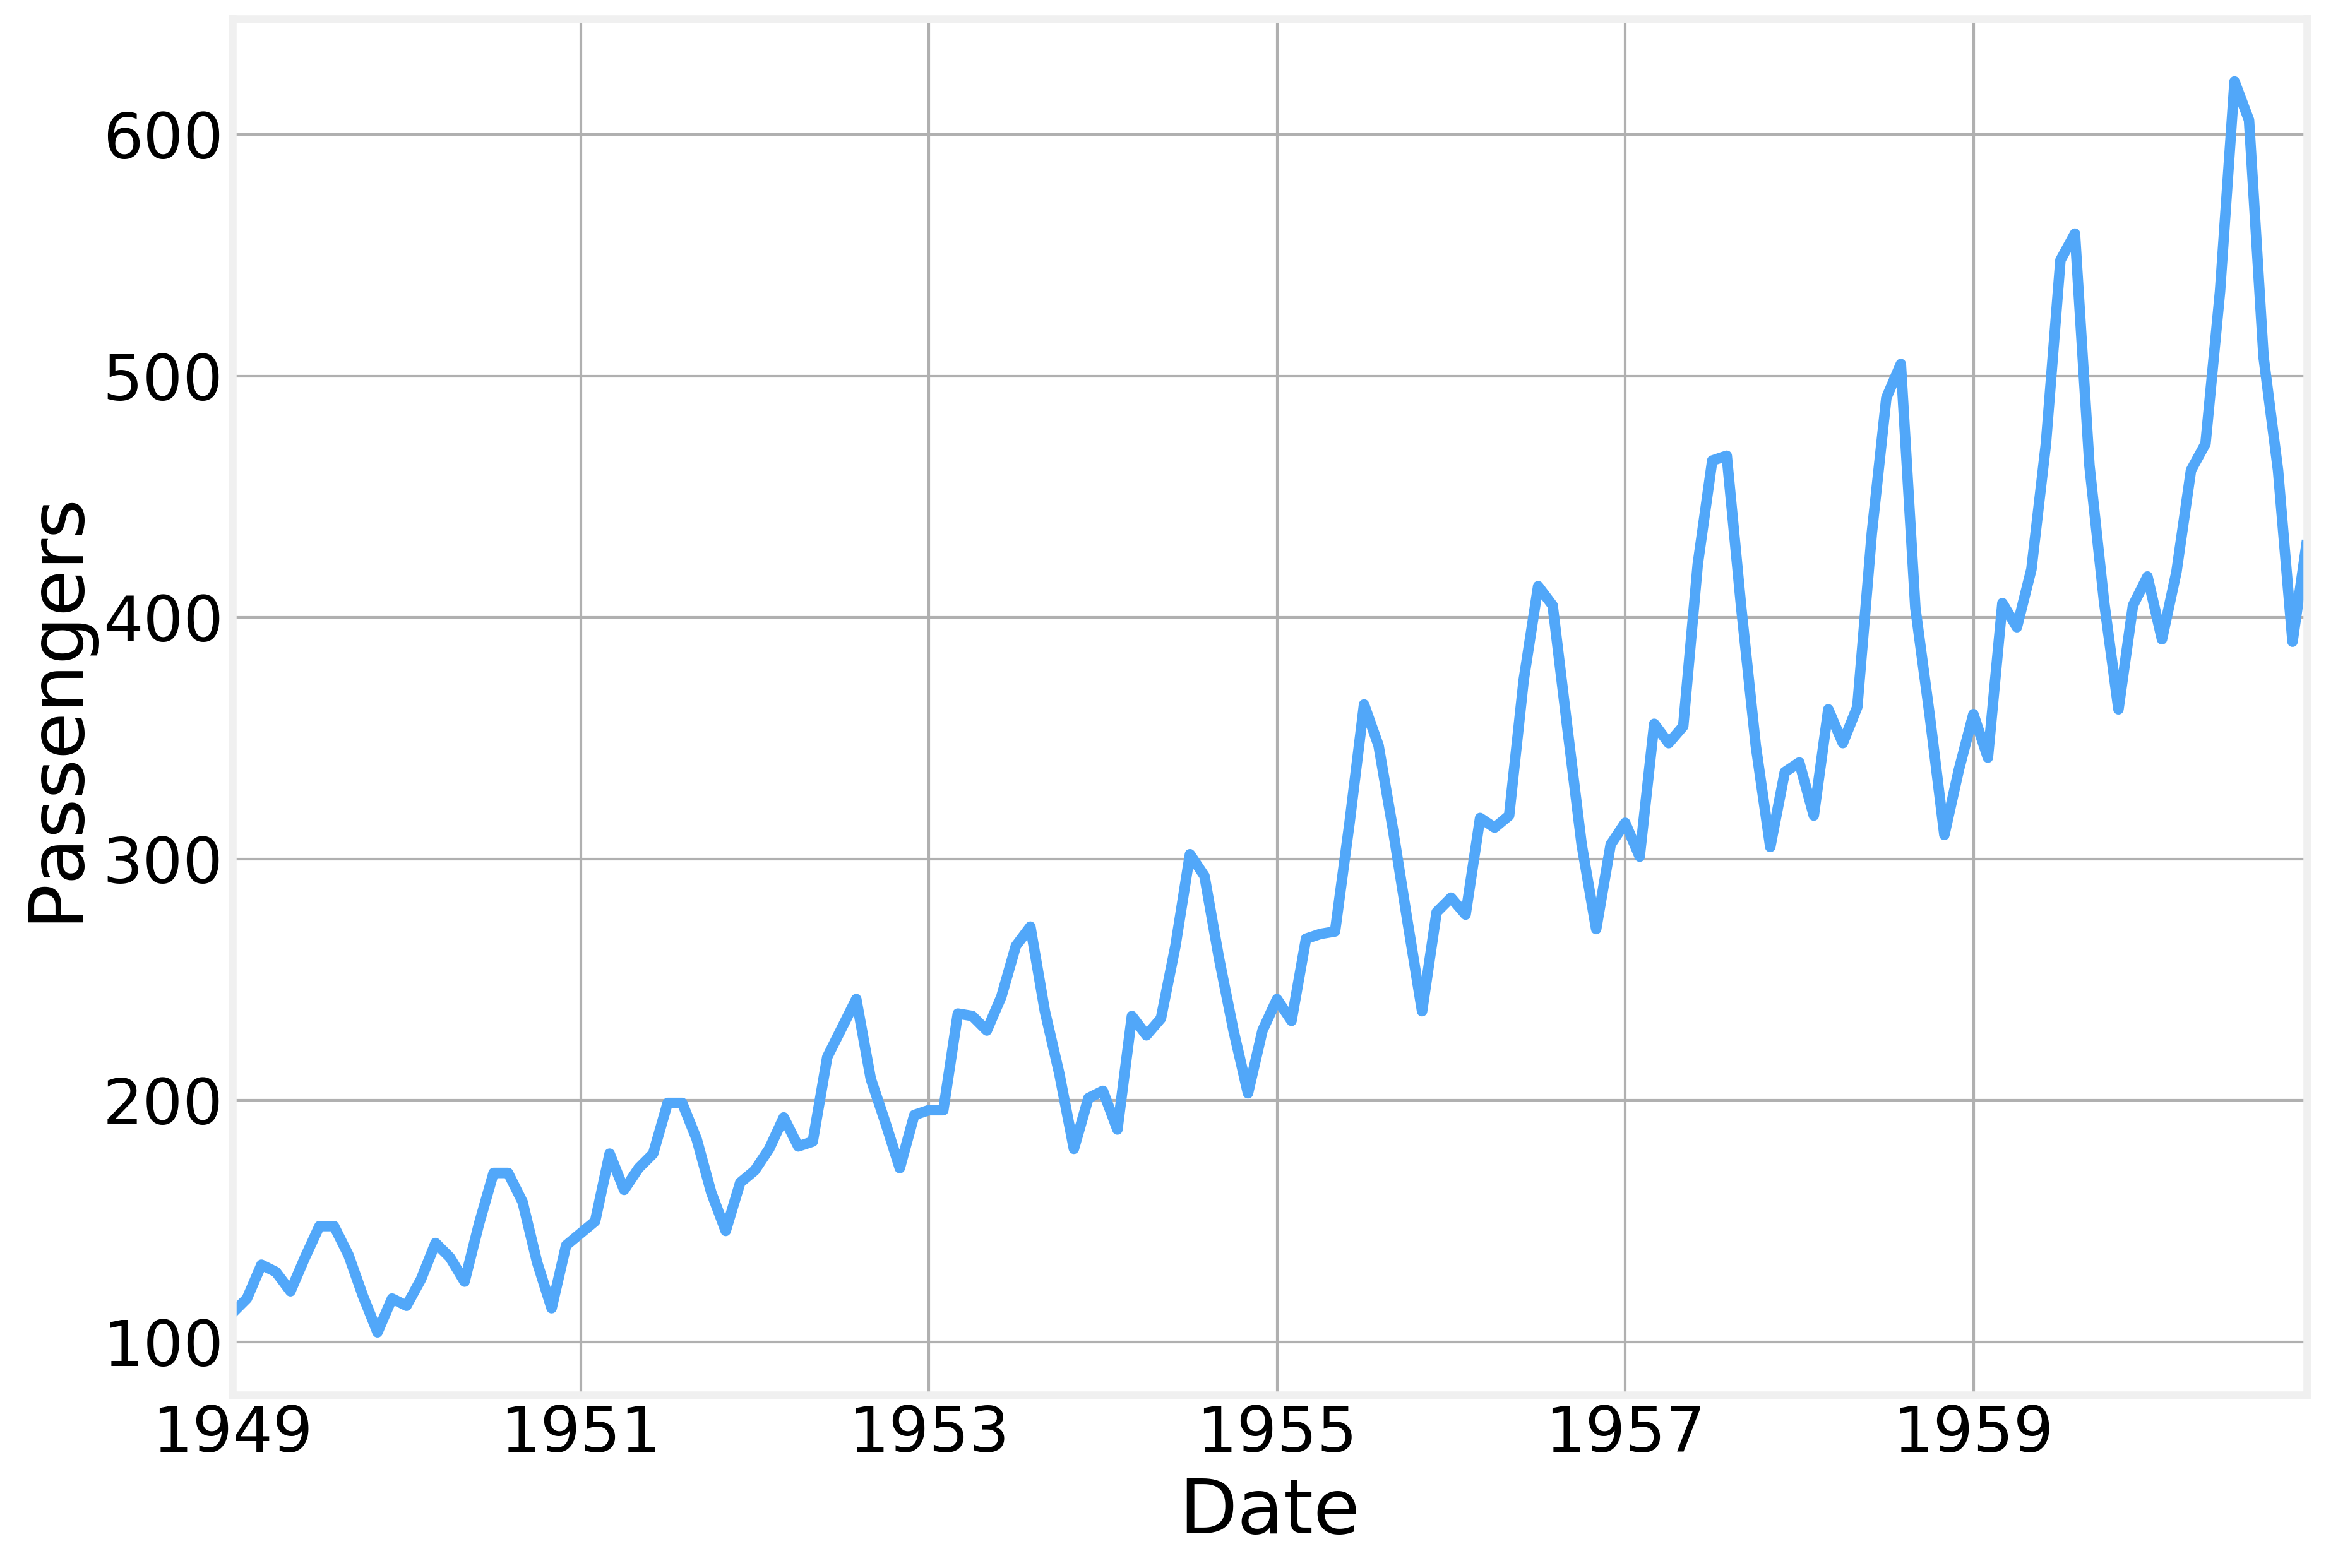

In [29]:
airline.plot(legend=False)
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')

# Types of non-stationarity

There are several kinds of non-stationarity. Here we illustrate the most common ones with simple toy examples

In [30]:
x = np.linspace(0, np.pi*10, 360)
y = np.sin(x)

We can generate the differnet kinds with a few simple algebraic manipulations

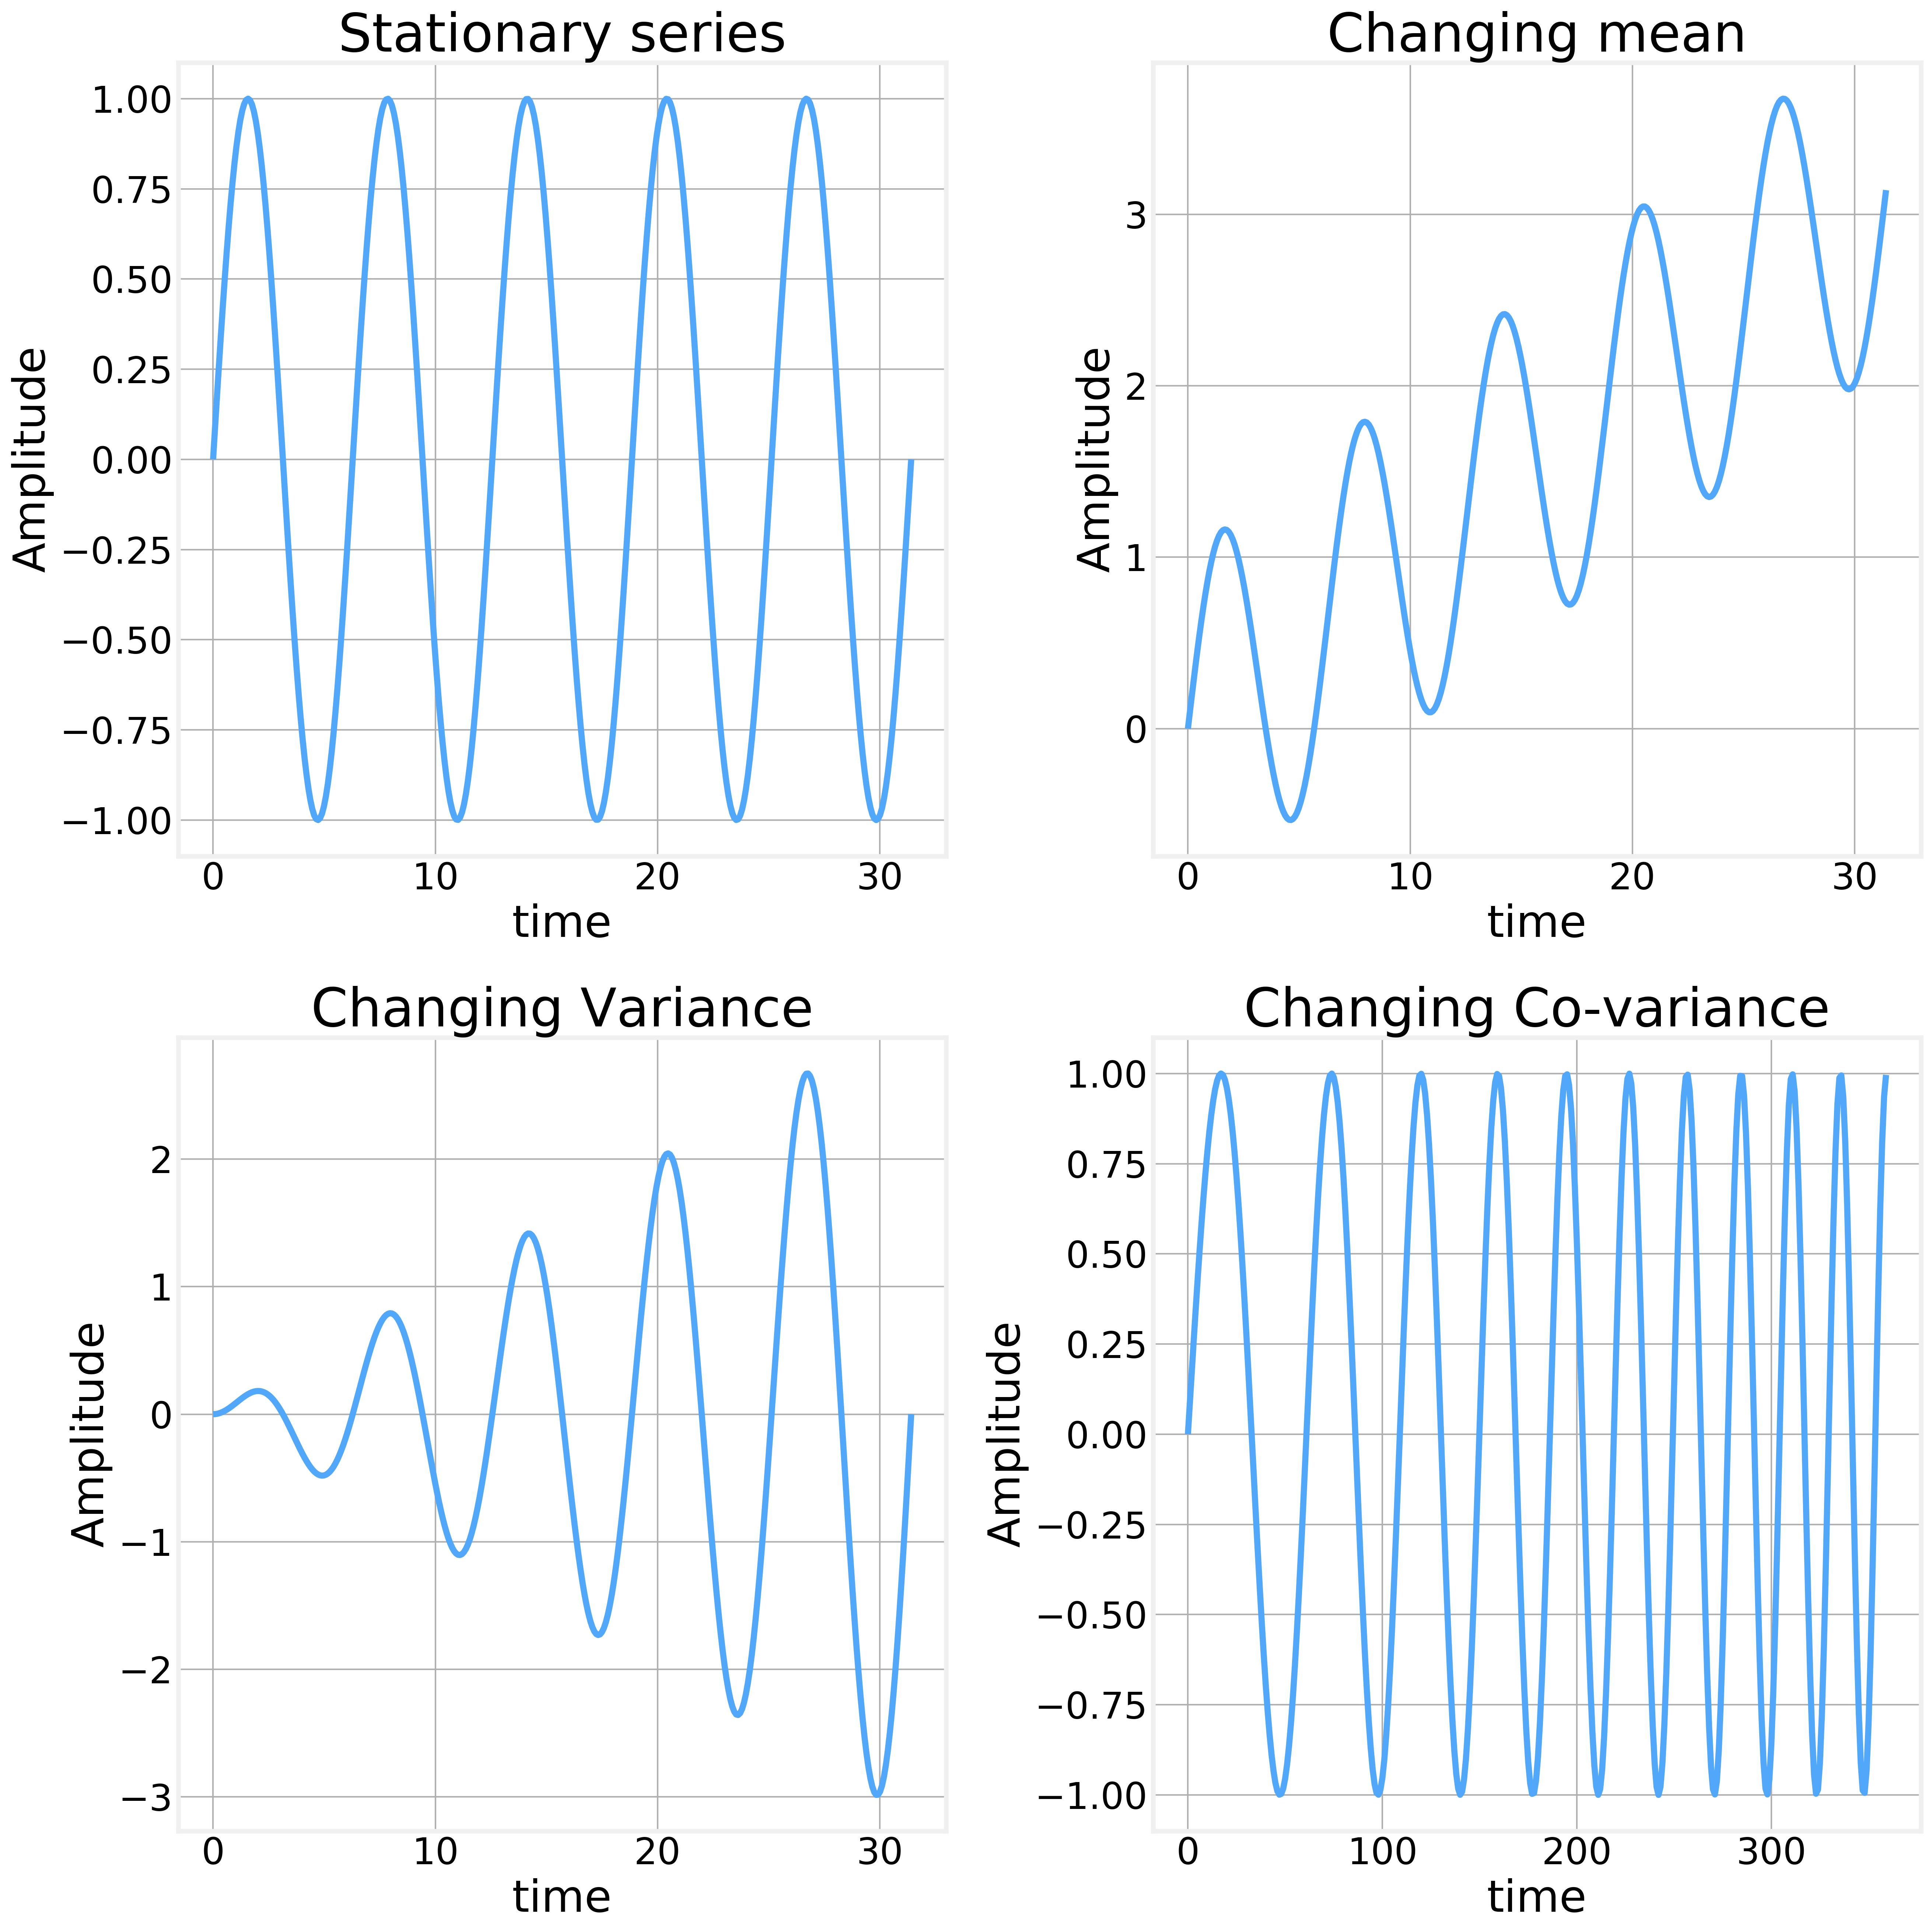

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
axs[0][0].plot(x, y)
axs[0][0].set_title('Stationary series')
axs[0][0].set_xlabel('time')
axs[0][0].set_ylabel('Amplitude')

axs[0][1].plot(x, y+x/10)
axs[0][1].set_title('Changing mean')
axs[0][1].set_xlabel('time')
axs[0][1].set_ylabel('Amplitude')


axs[1][0].plot(x, y*x/10)
axs[1][0].set_title('Changing Variance')
axs[1][0].set_xlabel('time')
axs[1][0].set_ylabel('Amplitude')

axs[1][1].plot(np.sin(x+x*x/30))
axs[1][1].set_title('Changing Co-variance')
axs[1][1].set_xlabel('time')
axs[1][1].set_ylabel('Amplitude')

plt.tight_layout()

# Kinds of trend

Two of the most common non-stationarity types are due to differnet kinds of trends that we illustrate here

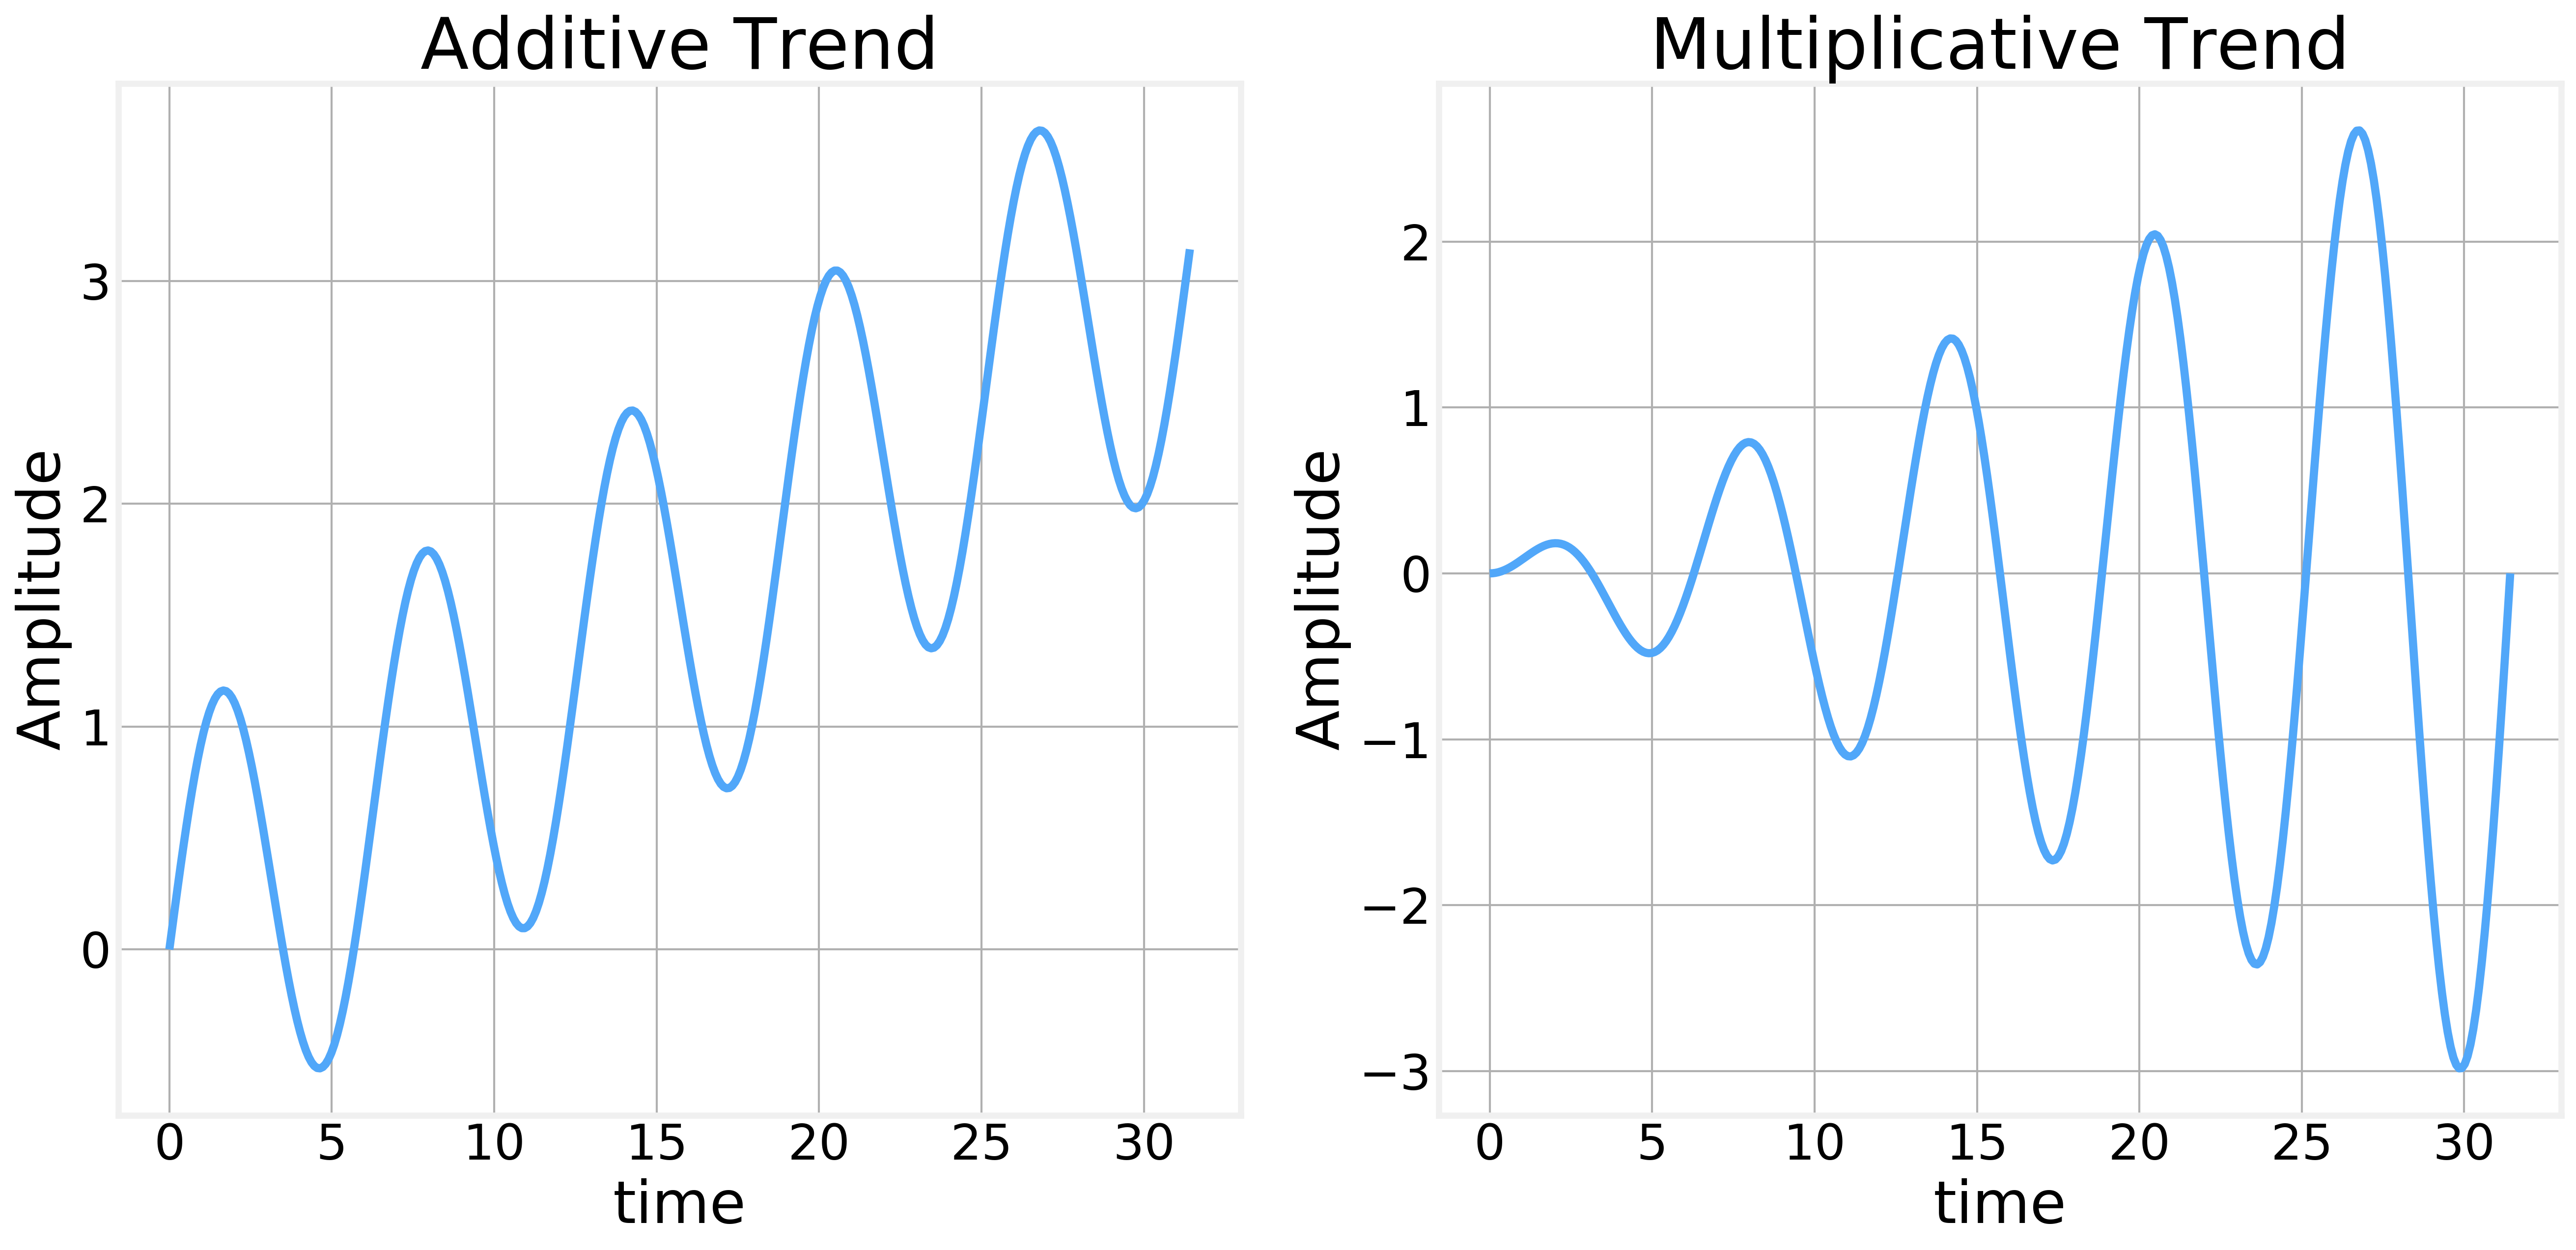

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
axs[0].plot(x, y+x/10)
axs[0].set_title('Additive Trend')
axs[0].set_xlabel('time')
axs[0].set_ylabel('Amplitude')


axs[1].plot(x, y*x/10)
axs[1].set_title('Multiplicative Trend')
axs[1].set_xlabel('time')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>